In [ ]:
!pip install simpletransformers

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from simpletransformers.classification import ClassificationModel

In [4]:
path = '/content/drive/My Drive/data/IMDB_Dataset.csv'
df = pd.read_csv(path)
df['label'] = (df['sentiment']=='positive').astype(int)
df.rename({'review': 'text'}, axis=1, inplace=True)
df.drop('sentiment', axis=1, inplace=True)

df_train, df_valid = train_test_split(df, test_size=0.2)

In [6]:
args = {'fp16':False, 'wandb_project': 'bert-imdb', 'num_train_epochs': 1,
        'overwrite_output_dir':True, 'learning_rate': 3e-5} #2e-5 slightly lower accuracy

In [7]:
model = ClassificationModel('bert', 'bert-base-uncased', use_cuda=True, args=args) 
model.train_model(df_train, output_dir='bert-imdb')
result, model_outputs, wrong_predictions = model.eval_model(df_valid)

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:449: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/40000 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Running Epoch 0 of 1:   0%|          | 0/5000 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1029: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/10000 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/1250 [00:00<?, ?it/s]

Training loss,0.91786
lr,0.0
global_step,5000
_runtime,1107
_timestamp,1619729742
_step,99


Training loss,▅▃▄▅▄▂▁▂▂▂▂▃▅▂▂▃▄▆▃▂▄▁█▂▂▄▄▁▁▅▁▁▁▅▁▁▂▇▂▆
lr,▂▅███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
global_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_runtime,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
_timestamp,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


In [8]:
f"accuracy: {(result['tp']+result['tn'])/(result['tp']+result['tn']+result['fp']+result['fn'])}"

'accuracy: 0.8858'

In [ ]:
con_mat_df = pd.DataFrame(np.array([[result['tn'], result['fp']],
                                    [result['fn'], result['tp']]]),
                               columns=["negative", "positive"],
                               index=["negative", "positive"])
f,ax = plt.subplots(figsize=(5, 3))
sns.heatmap(con_mat_df, annot=True, vmax=2200, vmin=200, cmap=plt.cm.Blues,fmt='g')
plt.tight_layout()
ax.set_title('DistilBERT finetuned SST-2', fontsize=16)
ax.set_xlabel('Predicted', fontsize=14)
ax.set_ylabel('True', fontsize=14)
plt.show()

In [ ]:
model.predict(['the movie was worse than washing my grandpa\'s catheter'])

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

([1], array([[-2.73560262,  2.52424264]]))

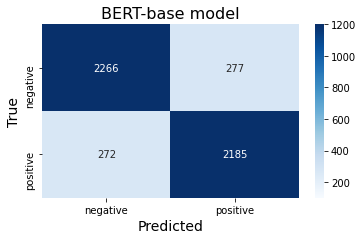

In [ ]:
#first run
con_mat_df = pd.DataFrame(np.array([[result['tn'], result['fp']],
                                         [result['fn'], result['tp']]]),
                               columns=["negative", "positive"],
                               index=["negative", "positive"])
f,ax = plt.subplots(figsize=(5, 3))
sns.heatmap(con_mat_df, annot=True, vmax=2200, vmin=200, cmap=plt.cm.Blues,fmt='g')
plt.tight_layout()
ax.set_title('BERT-base model', fontsize=16)
ax.set_xlabel('Predicted', fontsize=14)
ax.set_ylabel('True', fontsize=14)
plt.show()

In [ ]:
(result['tp']+result['tn'])/(result['tp']+result['tn']+result['fp']+result['fn'])

0.8902